In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
dataset = pd.read_csv('Social_Network_Ads.csv').values
print(dataset)
# X: age, salary
# y: purchased
# 나이와 연봉에 따라 자동차 구입 여부
# 목표: 소비자의 나이와 연봉을 입력했을 때, 자동차를 구입할 것인지 예측

[[   19 19000     0]
 [   35 20000     0]
 [   26 43000     0]
 ...
 [   50 20000     1]
 [   36 33000     0]
 [   49 36000     1]]


In [5]:
# X와 y 분리
# ※ X와 y에 해당하는 열의 index를 반드시 확인할 것
# ex> y가 index=0이고 나머지가 X인 경우:
#     y = dataset[:,0], X = dataset[:,1:]
X = dataset[:,:-1]
y = dataset[:,-1]

In [6]:
# training과 test 데이터 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# X는 age와 salary 2개의 값으로 구성됨
# training 데이터는 300개, test 데이터는 100개

(300, 2) (100, 2) (300,) (100,)


In [15]:
# KNN의 경우, X의 거리에 의해 예측값이 결정되는데
# X의 특징 간의 크기가 차이날 경우, 무시되는 특징이 있을 수 있으므로
# 모든 특징을 일정한 간격으로 변경하는 스케일링 필요함
# ex> 위의 경우, age는 18~60, salary는 30000~100000이므로,
#     거리를 측정하면, age는 거의 무시됨
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
# scaling을 위한 파라미터를 계산함 (평균, 분산 등) -> sc에 저장
X_train_sc = sc.transform(X_train)
# fit을 통해 계산된 파라미터를 이용하여, 실제 변환 수행

In [16]:
from sklearn.neighbors import KNeighborsClassifier

k = 5

# 1. X를 scaling 하지 않은 KNN
knn = KNeighborsClassifier(n_neighbors=k)
# KNN의 k(n_neighbors)를 설정해야 함 (디폴트)
knn.fit(X_train,y_train)

# 2. X를 scaling한 KNN
knn_sc = KNeighborsClassifier(n_neighbors=k)
knn_sc.fit(X_train_sc,y_train)

KNeighborsClassifier()

In [18]:
# test 데이터 입력에 대한 예측값
# 1. scaling 하지 않은 X_test에 대한 예측값
y_pred = knn.predict(X_test)

# 2. sclaing한 X_test에 대한 예측값
# knn_sc의 경우, 학습할 때, scaling한 X를 사용하였으므로,
# predict할 때도, scaling한 X를 입력해야 함
X_test_sc = sc.transform(X_test)
# test 데이터는 fit을 하지 않음, training 데이터로 fit한 결과를 이용하여 transform 수행
y_pred_sc = knn_sc.predict(X_test_sc)
# predict의 결과는 0 또는 1

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [19]:
# X_test와 scaling한 X_test_sc
print(X_test)
print(X_test_sc)

[[    36  33000]
 [    39  61000]
 [    36 118000]
 [    39 122000]
 [    26 118000]
 [    38  65000]
 [    20  36000]
 [    49  89000]
 [    31  18000]
 [    48 141000]
 [    34  72000]
 [    39  73000]
 [    35  72000]
 [    48 131000]
 [    53  82000]
 [    56 133000]
 [    60  83000]
 [    27  58000]
 [    28  87000]
 [    60 102000]
 [    40  75000]
 [    50  88000]
 [    44 139000]
 [    47  43000]
 [    45  26000]
 [    26  15000]
 [    58  47000]
 [    49  74000]
 [    53  34000]
 [    52 114000]
 [    39  42000]
 [    19  76000]
 [    18  86000]
 [    57  74000]
 [    27  84000]
 [    30  80000]
 [    22  18000]
 [    32  86000]
 [    50  20000]
 [    19  25000]
 [    47 144000]
 [    58 101000]
 [    34 115000]
 [    23  66000]
 [    56  60000]
 [    31 118000]
 [    48  35000]
 [    47 113000]
 [    39  79000]
 [    52  38000]
 [    24  58000]
 [    37  53000]
 [    42  80000]
 [    46  28000]
 [    42  73000]
 [    37  62000]
 [    60  42000]
 [    36  52000]
 [    58  9500

In [20]:
# X_test에 대한 예측값(y_pred)과 실제 값(y_test)를 이용하여 정확도 계산
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,y_pred)
print(acc)

acc_sc = accuracy_score(y_test,y_pred_sc)
print(acc_sc)

0.75
0.88


### 시각화

In [21]:
# 실제 y값이 0인 X 데이터와 1인 X 데이터 분리
# ndarray[조건식]: 조건식을 만족하는 데이터만 반환
X_test0 = X_test[y_test==0,:] # y_test가 0인 X_test
X_test1 = X_test[y_test==1,:] # y_test가 1인 X_test

# 예측값이 0인 X와 1인 X 데이터 분리
X_test_pred0 = X_test[y_pred_sc==0,:] # y_pred_sc가 0인 X_test
X_test_pred1 = X_test[y_pred_sc==1,:] # y_pred_sc가 1인 X_test

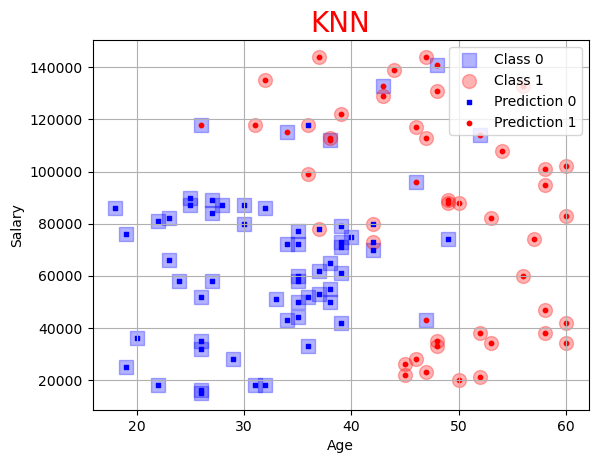

In [31]:
# X_test[:,0]: Age, X_test[:,1]: salary

# y_test 값에 따른 X_test plot(산점도)
plt.scatter(X_test0[:,0],X_test0[:,1],color='blue',marker='s',s=100,alpha=0.3,
           label='Class 0')
# color: 색상, marker: 마커 모양(s:사각형), s: 마커크기, alpha: 투명도
plt.scatter(X_test1[:,0],X_test1[:,1],color='red',marker='o',s=100,alpha=0.3,
           label='Class 1')

# y_pred_sc 값에 따른 X_test plot(산점도)
plt.scatter(X_test_pred0[:,0],X_test_pred0[:,1],color='blue',marker='s',s=10,
           label='Prediction 0')
plt.scatter(X_test_pred1[:,0],X_test_pred1[:,1],color='red',marker='o',s=10,
           label='Prediction 1')

plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('KNN',color='red',fontsize=20)
plt.grid()
plt.legend()